In [ ]:
# This reads in data from grism PSF scans and SPC translation stage positions

# created 2019 Jan 03 by E.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#test1 = pd.read_csv("altair_opd_grism_scan1.csv") # useless
test2pre = pd.read_csv("altair_opd_grism_scan2.csv")
test3pre = pd.read_csv("altair_opd_grism_scan3.csv")
test4pre = pd.read_csv("engineering_opd_grism_scan1.csv")

In [15]:
# disregard points that have abs value < 5 deg, or >45 deg

test2 = test2pre.where(np.logical_and((np.abs(test2pre["angle"]) >= 3), (np.abs(test2pre["angle"]) <= 45))).dropna(axis=0)
test3 = test3pre.where(np.logical_and((np.abs(test3pre["angle"]) >= 3), (np.abs(test3pre["angle"]) <= 45))).dropna(axis=0)
test4 = test4pre.where(np.logical_and(
    np.logical_and((np.abs(test4pre["angle"]) >= 3), (np.abs(test4pre["angle"]) <= 45)),
    test4pre["framenum"] < 1420)).dropna(axis=0)
test5 = test4pre.where(np.logical_and(
    np.logical_and((np.abs(test4pre["angle"]) >= 3), (np.abs(test4pre["angle"]) <= 45)),
    test4pre["framenum"] > 1420)).dropna(axis=0)

In [19]:
test5

,framenum,angle,spc_trans
48,1422.0,-38.659808,399500.0
49,1423.0,-36.634114,399750.0
50,1424.0,-36.384352,400000.0
52,1426.0,-33.340707,400750.0
53,1427.0,-33.340707,400750.0
54,1428.0,-32.660913,401000.0
55,1429.0,-32.380678,401250.0
56,1430.0,-30.343249,401500.0
57,1431.0,-27.699473,401750.0
58,1432.0,-25.407718,402000.0


In [24]:
# find best linear fits
coeffs2 = np.polyfit(np.array(test2["angle"]),
                     np.array(np.subtract(test2["spc_trans"],np.min(test2["spc_trans"]))),1)
coeffs3 = np.polyfit(np.array(test3["angle"]),
                     np.array(np.subtract(test3["spc_trans"],np.min(test3["spc_trans"]))),1)
coeffs4 = np.polyfit(np.array(test4["angle"]),
                     np.array(np.subtract(test4["spc_trans"],np.min(test4["spc_trans"]))),1)
coeffs5 = np.polyfit(np.array(test5["angle"]),
                     np.array(np.subtract(test5["spc_trans"],np.min(test5["spc_trans"]))),1)

In [25]:
coeffs4

array([ 135.29840976, 5626.96007532])

In [26]:
coeffs5

array([ 190.64688344, 7570.62857734])

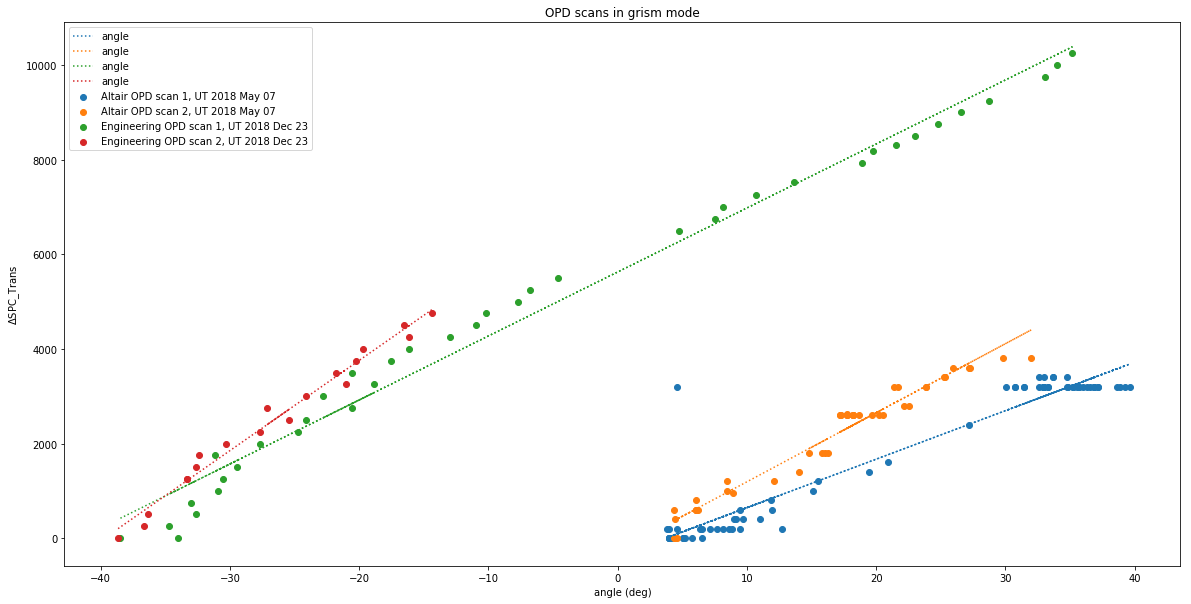

In [29]:
f, (ax2) = plt.subplots(1, 1, figsize=(20,10), sharey=True)

#ax1.scatter(test1["angle"],np.subtract(test1["spc_trans"],np.min(test1["spc_trans"]))

angle_lim = [-45,45]

ax2.set_xlabel("angle (deg)")
ax2.set_ylabel("$\Delta$SPC_Trans")
ax2.set_title("OPD scans in grism mode")

ax2.scatter(test2["angle"],np.subtract(test2["spc_trans"],np.min(test2["spc_trans"])), 
            label="Altair OPD scan 1, UT 2018 May 07")
ax2.plot(test2["angle"], np.add(coeffs2[1],coeffs2[0]*test2["angle"]), linestyle=':')

ax2.scatter(test3["angle"],np.subtract(test3["spc_trans"],np.min(test3["spc_trans"])), 
            label="Altair OPD scan 2, UT 2018 May 07")
ax2.plot(test3["angle"], np.add(coeffs3[1],coeffs3[0]*test3["angle"]), linestyle=':')

ax2.scatter(test4["angle"],np.subtract(test4["spc_trans"],np.min(test4["spc_trans"])), 
            label="Engineering OPD scan 1, UT 2018 Dec 23")
ax2.plot(test4["angle"], np.add(coeffs4[1],coeffs4[0]*test4["angle"]), linestyle=':')

ax2.scatter(test5["angle"],np.subtract(test5["spc_trans"],np.min(test5["spc_trans"])), 
            label="Engineering OPD scan 2, UT 2018 Dec 23")
ax2.plot(test5["angle"], np.add(coeffs5[1],coeffs5[0]*test5["angle"]), linestyle=':')


ax2.legend()
#ax4.set_title("Engineering OPD scans, UT 2018 Dec 23")

f.savefig("opd_angle_spc_mapping.pdf")

In [32]:
# fit polynomial

slopes_array = np.array([coeffs5[0],coeffs2[0],coeffs3[0],coeffs4[0]])

print("The differential amount by which to move the SPC_Trans in the NEGATIVE direction "+\
      "for every degree in the positive direction:")
np.mean(slopes_array)

The differential amount by which to move the SPC_Trans in the NEGATIVE directionfor every degree in the positive direction:


143.6065421893421

In [74]:
coeffs1 = np.polyfit(np.array(test2["angle"]),
                     np.array(np.subtract(test2["spc_trans"],np.min(test2["spc_trans"]))),1)
coeffs2 = np.polyfit(np.array(test3["angle"]),
                     np.array(np.subtract(test3["spc_trans"],np.min(test3["spc_trans"]))),1)
coeffs3 = np.polyfit(np.array(test4["angle"][0:47]),
                     np.array(np.subtract(test4["spc_trans"][0:47],np.min(test4["spc_trans"]))),1)
coeffs4 = np.polyfit(np.array(test4["angle"][47:]),
                     np.array(np.subtract(test4["spc_trans"][47:],np.min(test4["spc_trans"]))),1)

array([ 102.50008894, -381.09621135])

In [ ]:
consider only btwn deg = 5 and 45
(has tendency to get caught on unmasked low-freq node, or noise elsewhere)